In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import seaborn as sns
from matplotlib import pyplot as plt
import re
import pickle
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
df1=pd.read_csv("/content/sample_data/COVID Fake News Data (2).csv")
df2=df1

In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **Data Preprocessing**

In [4]:
#Tokenization
def identify_tokens(row):
    review = row['headlines']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    #token_words = [w for w in tokens if w.isalpha()]
    return tokens

In [5]:
#Stemming
stemming = PorterStemmer()
def stem_list(row):
    my_list = row['headlines']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

In [6]:
#Lemmatization 
lemmatizer = WordNetLemmatizer()
def lem_list(row):
    my_list = row['headlines']
    lemmatized_list = [lemmatizer.lemmatize(word) for word in my_list]
    return (lemmatized_list)

In [7]:
#Removing stop words
stops = set(stopwords.words("english"))                  
def remove_stops(row):
    my_list = row['headlines']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

In [8]:
#Rejoining Tweets
def rejoin_words(row):
    my_list = row['headlines']
    joined_words = ( " ".join(my_list))
    return joined_words

In [9]:
df2["headlines"]=df2["headlines"].str.lower()
df2["headlines"]=df2["headlines"].str.replace("[^a-zA-Z]"," ") #Removing Punctuations
df2["headlines"]=df2["headlines"].str.encode('ascii', 'ignore').str.decode('ascii') #Removing Unicodes
df2["headlines"]=df2["headlines"].str.replace('\d+','')#Removing numbers
df2['headlines']=df2.apply(identify_tokens, axis=1)
df2['headlines']=df2.apply(stem_list, axis=1)
df2["headlines"]=df2.apply(lem_list, axis=1)
df2['headlines']=df2.apply(remove_stops, axis=1)
df2['headlines']=df2.apply(rejoin_words, axis=1)


In [10]:

df2.to_csv("Fake_News_cleaned.csv")

## **Data** **Visualization**

[Text(0, 0, 'False'), Text(0, 0, 'True')]

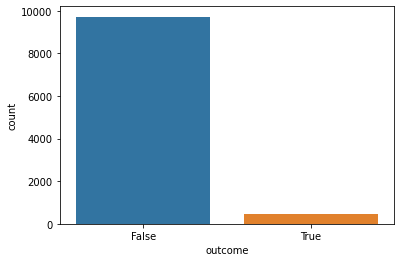

In [11]:

ax = sns.countplot(x="outcome", data=df2)
ax.set_xticklabels(["False","True"])

In [12]:
#Words Analysis

In [13]:
words=[]
word_list=[]
for a in df2["headlines"]:
  tokens = nltk.word_tokenize(a)
  words.append(tokens)

for b in words:
    word_list += b
word_cloud = " ".join(word_list)

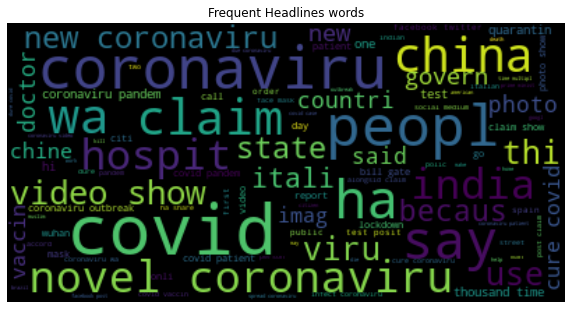

In [14]:
word= WordCloud(background_color="black",max_font_size=50, max_words=100).generate(word_cloud)
plt.figure(figsize = (10,10))
plt.imshow(word, interpolation='bilinear')
plt.axis("off")
plt.title("Frequent Headlines words")
plt.show()

In [15]:

#Positive Words & Negative Words Analysis
def words(data_frame,b):
  words=[]
  words_list=[]
  for a in data_frame[data_frame['outcome']==b]["headlines"]:
    tokens = nltk.word_tokenize(a)
    words.append(tokens) 
  for b in words:
    words_list += b
  word_cloud = " ".join(words_list)
  return word_cloud

In [16]:
#Words Visualization
def viz(a):
  word= WordCloud(background_color="black",max_font_size=50, max_words=100).generate(a)
  return word

In [17]:
#False Headlines words Visualization
word_clo=words(df2,0)
False_viz=viz(word_clo)

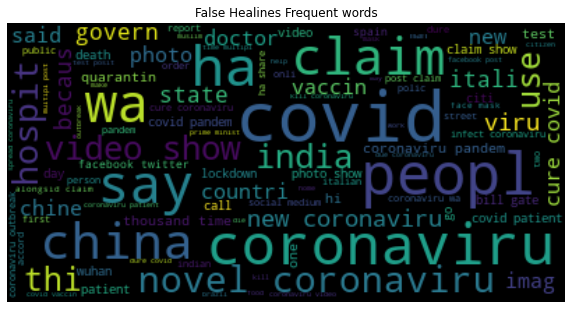

In [18]:
plt.figure(figsize = (10,10))
plt.imshow(False_viz, interpolation='bilinear')
plt.axis("off")
plt.title("False Healines Frequent words")
plt.show()

In [19]:
#True Headlines words Visualization
word_cloud_true=words(df2,1)
True_viz=viz(word_cloud_true)

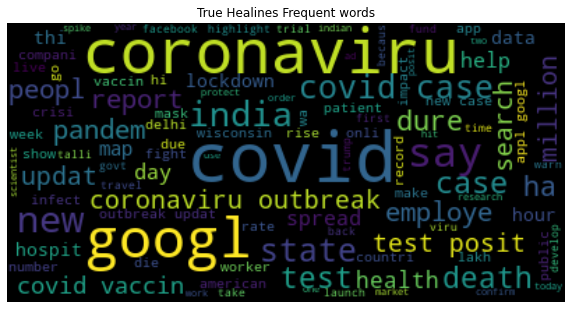

In [20]:
plt.figure(figsize = (10,10))
plt.imshow(True_viz, interpolation='bilinear')
plt.axis("off")
plt.title("True Healines Frequent words")
plt.show()

In [21]:
#Top 20 frequency words in corpus

In [22]:
Top_20_freq_words=pd.Series(word_list).value_counts()

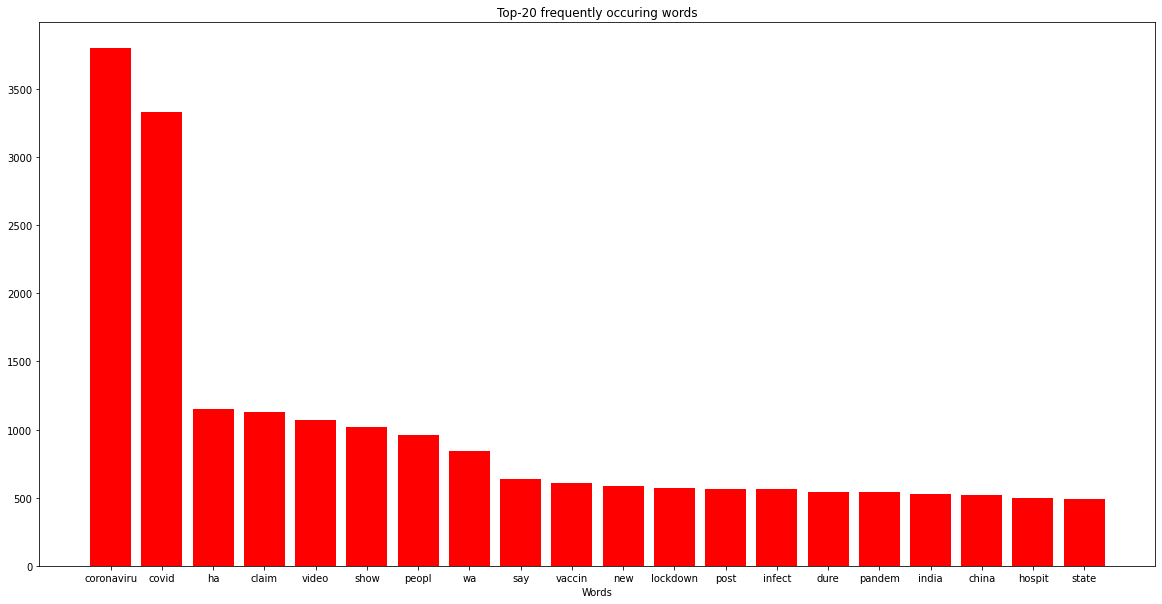

In [23]:
plt.figure(figsize = (20,10))
plt.bar(Top_20_freq_words.index[0:20],Top_20_freq_words.values[0:20],color="red")
plt.title('Top-20 frequently occuring words')
plt.xlabel('Words')
plt.show()

In [24]:

Each_sentence_word_count=[]
for a in df2['headlines']:
  Each_sentence_word_count.append(len(a))


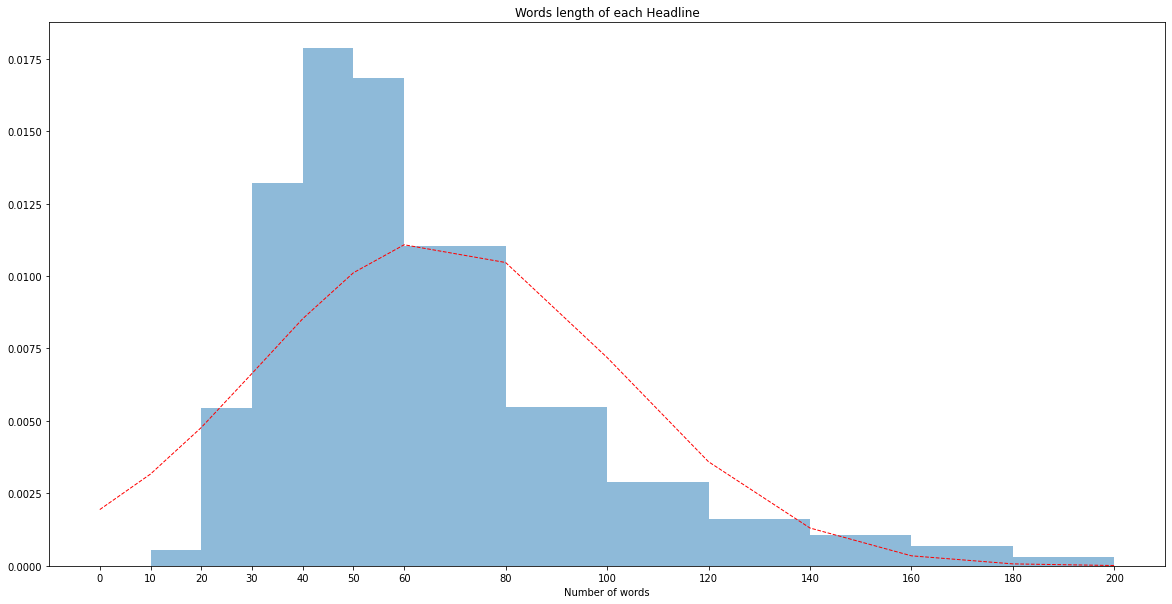

In [25]:
from scipy.stats import norm
num_bins =[0, 10, 20, 30, 40, 50, 60, 80, 100,120,140,160,180,200]
plt.subplots(figsize=(20,10))
n, bins, patches=plt.hist(Each_sentence_word_count,num_bins,density=True,alpha=0.5)
y = norm.pdf(bins,np.mean(Each_sentence_word_count), np.std(Each_sentence_word_count))
plt.plot(bins, y, 'r--', linewidth=1)
plt.title('Words length of each Headline')
plt.xticks(num_bins)
plt.xlabel('Number of words')
plt.show()


In [26]:
#Creating Bag of words model

**Creating TF-IDF model**

In [27]:
from sklearn import model_selection, naive_bayes
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df2['headlines'],df2['outcome'],test_size=0.3) #30 percent test 

In [28]:
review_list=[]
for a in range(len(Train_X)):
  review_list.append(f'Headlines : {a}')
df_TrainX_final=pd.DataFrame(review_list,columns=['Headlines'],index=None)

In [29]:
review_list_Test=[]
for a in range(len(Test_X)):
  review_list.append(f'Headlines : {a}')
df_TestX_final=pd.DataFrame(review_list,columns=['Headlines'],index=None)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer(ngram_range=(1,2),max_features=1000)
Tfidf_vect.fit(df2['headlines'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X).toarray()
Train_X_Tfidf_final_1=pd.DataFrame(Train_X_Tfidf,columns=Tfidf_vect.get_feature_names())
Train_X_Tfidf_final=pd.merge(df_TrainX_final,Train_X_Tfidf_final_1,left_index=True, right_index=True)
Train_X_Tfidf_final=pd.merge(Train_X_Tfidf_final_1,Train_Y,left_index=True, right_index=True)
Test_X_Tfidf = Tfidf_vect.transform(Test_X).toarray()
Test_X_Tfidf_final_1=pd.DataFrame(Test_X_Tfidf,columns=Tfidf_vect.get_feature_names())
Test_X_Tfidf_final=pd.merge(df_TestX_final,Test_X_Tfidf_final_1,left_index=True, right_index=True)
Test_X_Tfidf_final=pd.merge(Test_X_Tfidf_final_1,Test_Y,left_index=True, right_index=True)

In [31]:
Test_X_Tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**MultinomialNB** **Algoritham**

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
classifier=MultinomialNB()


In [33]:
previous_score=0
for a in np.arange(0,1,0.1):
  classifier_sub=MultinomialNB(alpha=a)
  classifier_sub.fit(Train_X_Tfidf,Train_Y.array)
  y_pred=classifier_sub.predict(Test_X_Tfidf)
  score=metrics.accuracy_score(Test_Y.array,y_pred)
  if score>previous_score:
    classifier=classifier_sub
    previous_score=score
  print("Alpha: {}, score: {}".format(a,score))


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, score: 0.9647174126102581
Alpha: 0.1, score: 0.9660241751061744
Alpha: 0.2, score: 0.9656974844821954
Alpha: 0.30000000000000004, score: 0.9650441032342372
Alpha: 0.4, score: 0.9650441032342372
Alpha: 0.5, score: 0.9640640313622999
Alpha: 0.6000000000000001, score: 0.9634106501143417
Alpha: 0.7000000000000001, score: 0.9627572688663836
Alpha: 0.8, score: 0.9621038876184254
Alpha: 0.9, score: 0.9614505063704671


Accuracy: 0.966


[Text(33.0, 0.5, 'Actual_Label'), Text(0.5, 15.0, 'Predicted_Label')]

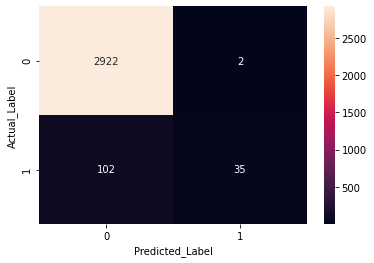

In [34]:
#Consfusion Matrix
y_pred=classifier.predict(Test_X_Tfidf)
score=metrics.accuracy_score(Test_Y.array,y_pred)
print("Accuracy: %0.3f" % score)
matrix=metrics.confusion_matrix(Test_Y.array,y_pred)
ax=sns.heatmap(matrix, annot=True, fmt='g')
ax.set(xlabel='Predicted_Label', ylabel='Actual_Label')

**SVM Algoritham**

In [35]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(Train_X_Tfidf,Train_Y.array)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Accuracy: 0.970


[Text(33.0, 0.5, 'Actual_Label'), Text(0.5, 15.0, 'Predicted_Label')]

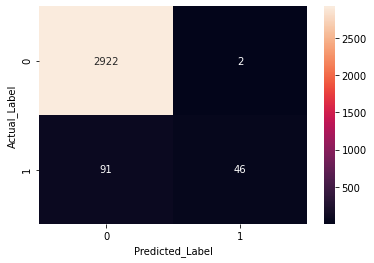

In [36]:
#Consfusion Matrix
y_pred=classifier_linear.predict(Test_X_Tfidf)
score=metrics.accuracy_score(Test_Y.array,y_pred)
print("Accuracy: %0.3f" % score)
matrix=metrics.confusion_matrix(Test_Y.array,y_pred)
ax=sns.heatmap(matrix, annot=True, fmt='g')
ax.set(xlabel='Predicted_Label', ylabel='Actual_Label')

**Passive Agressive Classifier**

In [67]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(Train_X_Tfidf,Train_Y.array)


PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [68]:
y_pred = classifier.predict(Test_X_Tfidf)
score = accuracy_score(Test_Y.array,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.89%


Accuracy: 0.939


[Text(33.0, 0.5, 'Actual_Label'), Text(0.5, 15.0, 'Predicted_Label')]

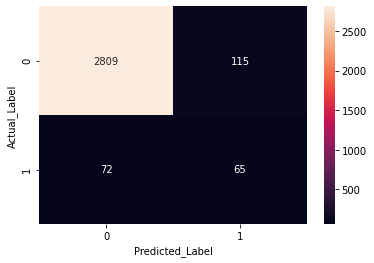

In [69]:
#Consfusion Matrix
y_pred=classifier.predict(Test_X_Tfidf)
score=metrics.accuracy_score(Test_Y.array,y_pred)
print("Accuracy: %0.3f" % score)
matrix=metrics.confusion_matrix(Test_Y.array,y_pred)
ax=sns.heatmap(matrix, annot=True, fmt='g')
ax.set(xlabel='Predicted_Label', ylabel='Actual_Label')

In [70]:
import pickle
filename = 'Passive_finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

**Classifying Real and Fake words**

In [71]:
names=Tfidf_vect.get_feature_names()
sorted(zip(classifier.coef_[0],names),reverse=True)[:10] #Real Words

[(19.825038800959575, 'googl'),
 (10.461330426283663, 'life'),
 (10.251839241792236, 'mobil'),
 (9.816297119185133, 'launch'),
 (9.123647033977917, 'vote'),
 (9.086644026066129, 'updat'),
 (8.971635087746005, 'app'),
 (8.82109033437075, 'social medium'),
 (8.74254862520873, 'long'),
 (8.224829763285877, 'ten')]

In [72]:
sorted(zip(classifier.coef_[0],names))[:10] #Fake Words

[(-13.249813369325823, 'everi'),
 (-10.223862745985786, 'due covid'),
 (-9.947718708355081, 'coronaviru crisi'),
 (-9.931870014762588, 'fight coronaviru'),
 (-9.210943081437224, 'govern'),
 (-8.608017170535305, 'governor'),
 (-8.591967166120963, 'minist health'),
 (-8.291112697013212, 'video'),
 (-7.995755899845641, 'thousand'),
 (-7.602248251374526, 'medic')]

**Model Saving into Disk**

In [73]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

**Model Loading from Disk**

In [74]:
loaded_model = pickle.load(open("/content/finalized_model.sav", 'rb'))
loaded_model_Passive = pickle.load(open("/content/Passive_finalized_model.sav", 'rb'))


**Headlines Testing with user Input**

In [75]:
def data_cleaning(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text) 
    text=nltk.word_tokenize(text)
    text=[stemming.stem(word) for word in text]
    text=[lemmatizer.lemmatize(word) for word in text]   
    text=[w for w in text if not w in stops]
    text=( " ".join(text))
    return text

In [76]:
def fake_headlines_test(news):
    new_headlines={"text":[news]}
    new_headlines_test = pd.DataFrame(new_headlines)
    new_headlines_test["text"] = new_headlines_test["text"].apply(data_cleaning)
    new_headlines_test = new_headlines_test["text"]
    new_headlines_vectors_test=Tfidf_vect.transform(new_headlines_test)
    outcome_MNB=loaded_model.predict(new_headlines_vectors_test)
    outcome_passive_Reg=loaded_model_Passive.predict(new_headlines_vectors_test)
    if outcome_passive_Reg==1:
      return "Real News"
    else:
      return "Fake News"


In [79]:
news=str(input("Enter Headlines"))

fake_headlines_test(news)

Enter Headlines60,000 Argentinian companies have closed due to COVID-19; also, all companies receiving government aid during the pandemic will be expropriated by the governmen


'Fake News'

In [80]:
news=str(input("Enter Headlines"))

fake_headlines_test(news)

Enter HeadlinesThereâ€™s a â€œdirect correlationâ€ between North Carolinaâ€™s mask requirement and COVID-19 stabilizati


'Real News'